#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
# Importing necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Load your dataset
df = pd.read_csv(r'C:\Users\TWASOL\Downloads\Salaries.csv')
# let's again preview the dataset
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
# Display the column names of the DataFrame
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Task1
**Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.


In [3]:
# Display the number of rows and columns in the DataFrame
df.shape

(148654, 13)

In [4]:
# Display the data types of each column in the DataFrame
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [5]:
# check missing values in categorical variables
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

# Task2
**Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [6]:
# Display descriptive statistics for the DataFrame
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [7]:
# Check for negative values in the 'TotalPay' column
negative_values = df['TotalPay'] < 0

# Display a warning if any negative values are found
if negative_values.any():
    print("Warning: We've identified negative values in the 'TotalPay' column.")

In [8]:
# Filter rows with non-negative values in the 'TotalPay' column
df = df[df['TotalPay'] >= 0]

# If you want to reset the index after removing rows
df.reset_index(drop=True, inplace=True)

# Display the modified DataFrame
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


In [9]:
# Generating descriptive statistics for the 'TotalPay' column

df['TotalPay'].describe()

count    148653.000000
mean      74768.829102
std       50516.796790
min           0.000000
25%       36169.280000
50%       71427.040000
75%      105839.900000
max      567595.430000
Name: TotalPay, dtype: float64

In [10]:
# Calculate the mode for the 'TotalPay' column
mode_total_pay = df['TotalPay'].mode()

# Print the mode value(s) for 'TotalPay'
print("Mode for 'TotalPay' column:", mode_total_pay)


Mode for 'TotalPay' column: 0    0.0
Name: TotalPay, dtype: float64


# Task3
 **Data Cleaning**: Handle missing data by suitable method with explain why you use it.


In [11]:
# Recap of missing values
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148653
Agency                   0
Status              148653
dtype: int64

In [12]:
# Drop columns containing all NaN values(['Notes','Status'])
df = df.dropna(axis=1, how='all')
df


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco


In [13]:
warnings.filterwarnings("ignore")

# Replace NaN values in 'BasePay', 'Benefits', a columns with 0
df['BasePay'].fillna(0, inplace=True)
df['Benefits'].fillna(0, inplace=True)
df


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,0.00,NaN,NaN,0.0,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,0.00,NaN,NaN,0.0,0.00,0.00,2014,San Francisco


In [14]:
# Filtering rows where 'BasePay' is equal to zero
zero_basepay_rows = df[df['BasePay'] == 0]

# Displaying rows where 'BasePay' is zero
print(zero_basepay_rows)


            Id      EmployeeName                JobTitle  BasePay  \
2896      2897        JOHN PAYNE             MANAGER VII      0.0   
3263      3264  LAWRENCE BADINER              MANAGER VI      0.0   
19058    19059     PETER LEONARD  FIRE FIGHTER PARAMEDIC      0.0   
20834    20835   MICHAEL COLLINS       POLICE OFFICER II      0.0   
21658    21659   LINDA ZIMMERMAN     PUBLIC HEALTH NURSE      0.0   
...        ...               ...                     ...      ...   
148648  148649       Leon Walker               Custodian      0.0   
148649  148650     Roy I Tillery               Custodian      0.0   
148650  148651      Not provided            Not provided      0.0   
148651  148652      Not provided            Not provided      0.0   
148652  148653      Not provided            Not provided      0.0   

        OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  Year  \
2896           0.00  142245.22       0.0  142245.22         142245.22  2011   
3263         

>.**We note that in the case of column['BasePay'] = 0, column ['OtherPay'] = column ['TotalPay']**

In [15]:
# Display rows where 'OvertimePay' column contains NaN values
nan_overtime_rows = df[df['OvertimePay'].isna()]
nan_overtime_rows


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148646,148647,Not provided,Not provided,0.0,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148650,148651,Not provided,Not provided,0.0,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148651,148652,Not provided,Not provided,0.0,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148652,148653,Not provided,Not provided,0.0,NaN,NaN,0.0,0.0,0.0,2014,San Francisco


>.**Upon investigation, it was found that rows with missing values in the 'OvertimePay' column do not provide meaningful information about employees. Consequently, these rows will be removed from the DataFrame.**

In [16]:
# Drop rows with missing values in the 'OvertimePay' column
df = df.dropna(subset=['OvertimePay'])

# Display the DataFrame after dropping the rows
df


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148644,148645,Randy D Winn,"Stationary Eng, Sewage Plant",0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco


In [17]:
# Recap of missing values
df.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

# Task4
**Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

In [18]:
# Count the occurrences of each unique job title in the 'JobTitle' column
df['JobTitle'].value_counts()

JobTitle
Transit Operator                        7036
Special Nurse                           4389
Registered Nurse                        3736
Public Svc Aide-Public Works            2518
Police Officer 3                        2421
                                        ... 
BUILDING SERVICES TECHNICIAN               1
TRIAL DELAY REDUCTION COORDINATOR          1
POWERHOUSE ELECTRICIAN SUPERVISOR II       1
CHIEF NURSERY SPECIALIST                   1
Cashier 3                                  1
Name: count, Length: 2158, dtype: int64

In [19]:
# Set the maximum number of rows to display
pd.set_option('display.max_rows', None)

# Get unique values and display them
unique_values = df['JobTitle'].unique()
for value in unique_values:
    print(value)


GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
CAPTAIN III (POLICE DEPARTMENT)
WIRE ROPE CABLE MAINTENANCE MECHANIC
DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
ASSISTANT DEPUTY CHIEF II
BATTALION CHIEF, (FIRE DEPARTMENT)
DEPUTY DIRECTOR OF INVESTMENTS
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)
ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)
EXECUTIVE CONTRACT EMPLOYEE
DEPARTMENT HEAD V
COMMANDER III, (POLICE DEPARTMENT)
CAPTAIN, EMERGENCYCY MEDICAL SERVICES
ASSISTANT MEDICAL EXAMINER
CAPTAIN, FIRE SUPPRESSION
CHIEF OF POLICE
DEPUTY CHIEF III (POLICE DEPARTMENT)
INSPECTOR III, (POLICE DEPARTMENT)
ELECTRONIC MAINTENANCE TECHNICIAN
ADMINISTRATOR, SFGH MEDICAL CENTER
LIEUTENANT III (POLICE DEPARTMENT)
FIREFIGHTER
NURSING SUPERVISOR PSYCHIATRIC
MAYOR
LIEUTENANT, FIRE DEPARTMENT
INCIDENT SUPPORT SPECIALIST
ANESTHETIST
DISTRICT ATTORNEY
ELECTRICAL TRANSIT MECHANIC, ASSISTANT SUPERVISOR
PORT DIRECTOR
LIEUTENANT, BUREAU OF FIRE PREVENTION AND PUBLIC S
SENIOR PHYSICIAN SPECIALIST
FIRE FIGHTER PARA

In [20]:
warnings.filterwarnings("ignore")

# Extracting the word between parentheses in the "JobTitle" column
df['BetweenParentheses'] = df['JobTitle'].str.extract(r'\((.*?)\)')

# Displaying the unique words between parentheses
unique_words_between_parentheses = df['BetweenParentheses'].dropna().unique()
print(unique_words_between_parentheses)


['POLICE DEPARTMENT' 'FIRE DEPARTMENT' 'CIVIL & CRIMINAL' 'CIVIL/CRIMINAL'
 'MFCC' 'SEASONAL' 'Fire Dept' 'Cvl&Crmnl' 'Civil & Criminal' 'SFERS'
 'Police Department' 'Civil/Criminal' 'Seasonal' 'Fire Department']


In [21]:
warnings.filterwarnings("ignore")

# Initializing a default department
df['Department'] = 'Other'

# Dictionary mapping keywords to department names
dept_keywords = {
    'Transportation Department': ['Transit Operator', 'Driver', 'Transit'],
    'Police Department': ['Police', 'Deputy', 'Sheriff', 'Officer', 'Lieutenant', 'Trooper', 'Captain', 'Commander', 'Inspector'],
    'Security Department': ['Guard', 'Custodian', 'Protective', 'Support'],
    'Healthcare Department': ['Nurse', 'Doctor', 'Dr', 'Health', 'Medical', 'Patient', 'Nursery', 'Anaesthetist', 'Physician', 'Physical', 'Therapist', 'Nutritionist'],
    'Fire Department': ['Firefighter', 'Fire', 'Suppression', 'Battalion'],
    'Legal Department': ['Attorney', 'Eligibility', 'Legal', 'Court'],
    'Maintenance Department': ['Mech', 'Mechanic', 'Carpenter', 'Electrician'],
    'Engineering Department': ['Engineer', 'Eng', 'Technician', 'Engineering'],
    'Public Service Department': ['Public', 'Clerk', 'Svc', 'PS', 'Library', 'Gardener', 'Recreation', 'Worker', 'Librarian', 'Family', 'Svcs', 'Instructor', 'Preparator', 'Labourer'],
    'Administrative Department': ['Manager', 'Management', 'Head', 'Supervisor', 'Administrator', 'Supv'],
    'Analytics Department': ['Analyst', 'Tech', 'Research']
}

# Loop through departments and update 'Department' column
for department, keywords in dept_keywords.items():
    df.loc[df['JobTitle'].str.contains('|'.join(keywords), case=False), 'Department'] = department


In [22]:
# Step 2: Grouping rows based on the "JobTitle" column using groupby
grouped_df = df.groupby('JobTitle')

# Step 3: Selecting a row for each job using a group function such as max or first
consolidated_df = grouped_df.max()  # You can use any appropriate function here

# Step 4: Displaying the results
print(consolidated_df)

                                                        Id  \
JobTitle                                                     
ACCOUNT CLERK                                        35638   
ACCOUNTANT                                           35286   
ACCOUNTANT INTERN                                    34267   
ACPO,JuvP, Juv Prob (SFERS)                         135284   
ACUPUNCTURIST                                        18379   
ADMINISTRATIVE ANALYST                               34572   
ADMINISTRATIVE ANALYST II                            25471   
ADMINISTRATIVE ANALYST III                           11056   
ADMINISTRATIVE ENGINEER                              11230   
ADMINISTRATIVE SERVICES MANAGER                      23140   
ADMINISTRATOR, SFGH MEDICAL CENTER                      37   
AFFIRMATIVE ACTION SPECIALIST                        30538   
AGRICULTURAL INSPECTOR                               25096   
AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI   34812   
AIRPORT 

In [23]:
# Displaying the count of job titles assigned to each department

df['Department'].value_counts()

Department
Public Service Department    35473
Other                        24186
Healthcare Department        18985
Police Department            17350
Transportation Department    10046
Administrative Department     9215
Analytics Department          8855
Engineering Department        7442
Security Department           5964
Fire Department               5818
Legal Department              2726
Maintenance Department        2589
Name: count, dtype: int64

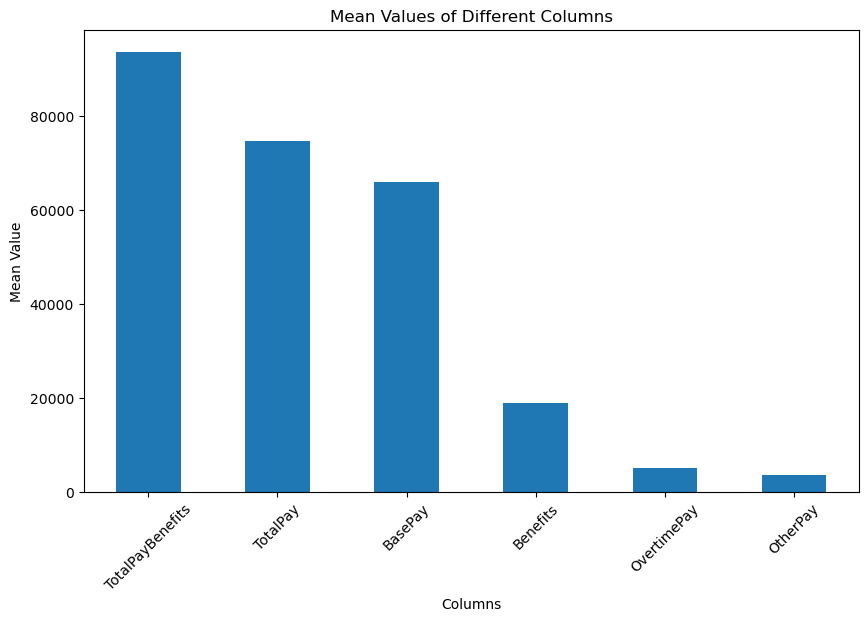

In [24]:
# Selecting the columns of interest
columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']

# Creating a DataFrame with selected columns
df_selected = df[columns]

# Plotting the mean values for each column using a bar chart
ax = df_selected.mean().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), rot=45)

# Setting x-axis label
ax.set_xlabel('Columns')

# Setting y-axis label
ax.set_ylabel('Mean Value')

# Setting the plot title
ax.set_title('Mean Values of Different Columns')

# Displaying the plot
plt.show()


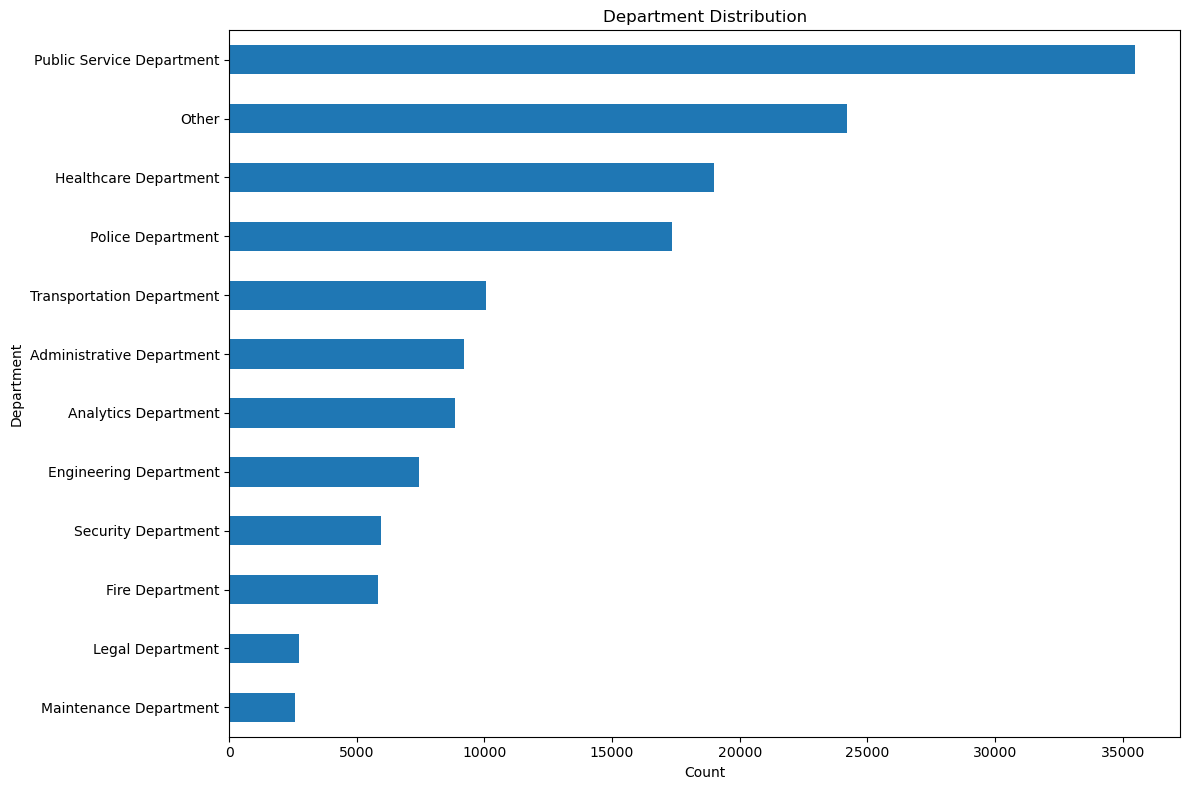

In [25]:
# Plot a horizontal bar chart
plt.figure(figsize=(12, 8))
df['Department'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Department Distribution')
plt.xlabel('Count')
plt.ylabel('Department')

# Show the plot
plt.tight_layout()
plt.show()

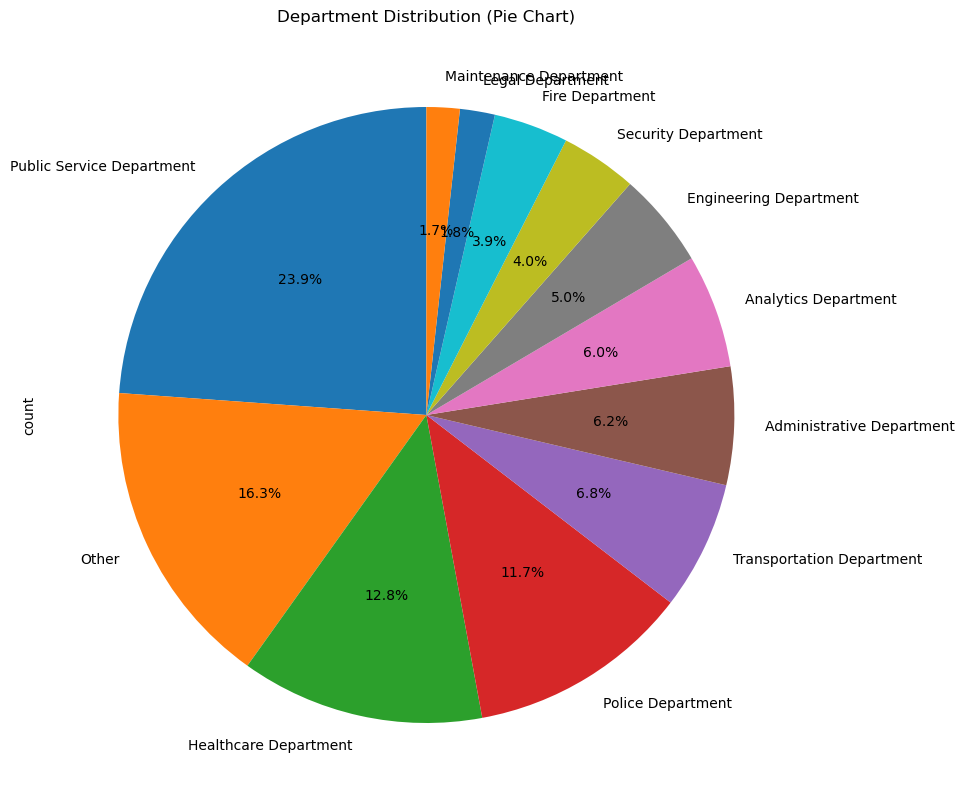

In [26]:
# Plot a pie chart
plt.figure(figsize=(10, 10))
df['Department'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Department Distribution (Pie Chart)')

# Show the plot
plt.show()


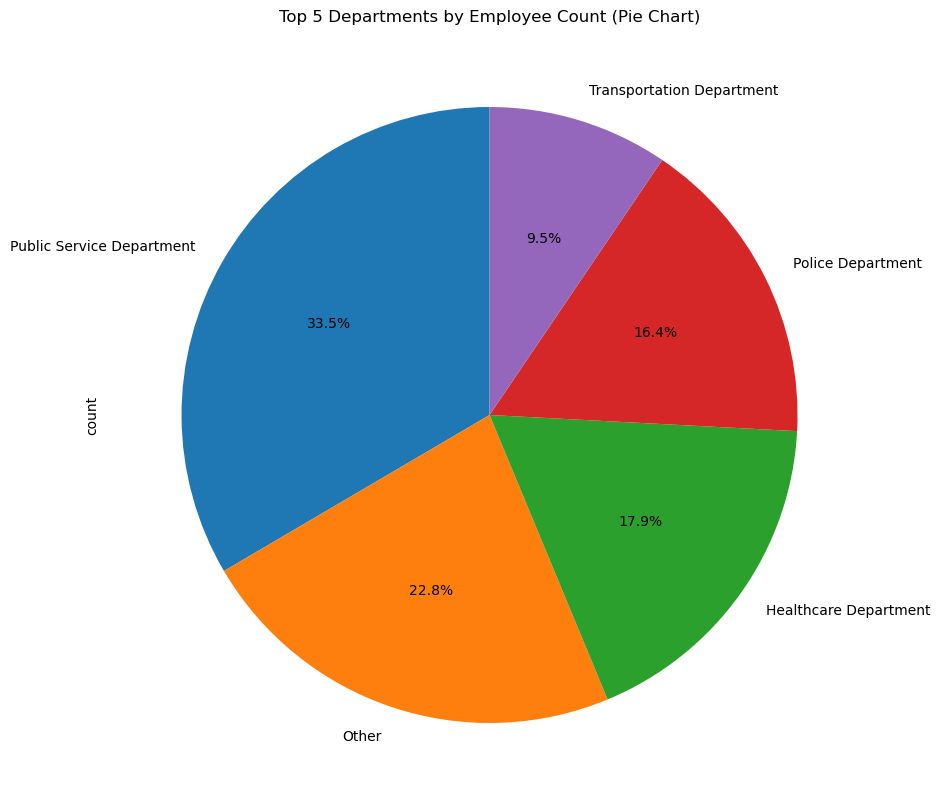

In [27]:
# Get the top 5 departments
top_departments = df['Department'].value_counts().nlargest(5)

# Plot a pie chart for the top 5 departments
plt.figure(figsize=(10, 10))
top_departments.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Departments by Employee Count (Pie Chart)')

# Show the plot
plt.show()


# Task5
** Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.


In [28]:
# Group by 'Department' and calculate the average 'BasePay' for each department
average_basepay_by_department = df.groupby('Department')['BasePay'].mean()

# Display the result
print(average_basepay_by_department)


Department
Administrative Department     99074.839818
Analytics Department          73866.493933
Engineering Department        81251.086122
Fire Department              109388.215125
Healthcare Department         62834.321765
Legal Department             107803.803324
Maintenance Department        72839.601645
Other                         66811.923668
Police Department             90142.201709
Public Service Department     39988.994918
Security Department           36973.295880
Transportation Department     51434.816675
Name: BasePay, dtype: float64


In [29]:
# Grouping the dataset by department and calculating summary statistics for 'BasePay' and 'TotalPay'
summary_stats = df.groupby('Department')[['BasePay', 'TotalPay']].describe()

# Display the summary statistics
print(summary_stats)


                           BasePay                                       \
                             count           mean           std     min   
Department                                                                
Administrative Department   9215.0   99074.839818  45794.311275    0.00   
Analytics Department        8855.0   73866.493933  31417.329580    0.00   
Engineering Department      7442.0   81251.086122  42723.054403    0.00   
Fire Department             5818.0  109388.215125  32741.765188    0.00   
Healthcare Department      18985.0   62834.321765  46944.178544    0.00   
Legal Department            2726.0  107803.803324  57660.923801    0.00   
Maintenance Department      2589.0   72839.601645  23897.372954    0.00   
Other                      24186.0   66811.923668  39645.207314    0.00   
Police Department          17350.0   90142.201709  37111.355693    0.00   
Public Service Department  35473.0   39988.994918  30372.326965 -166.01   
Security Department      

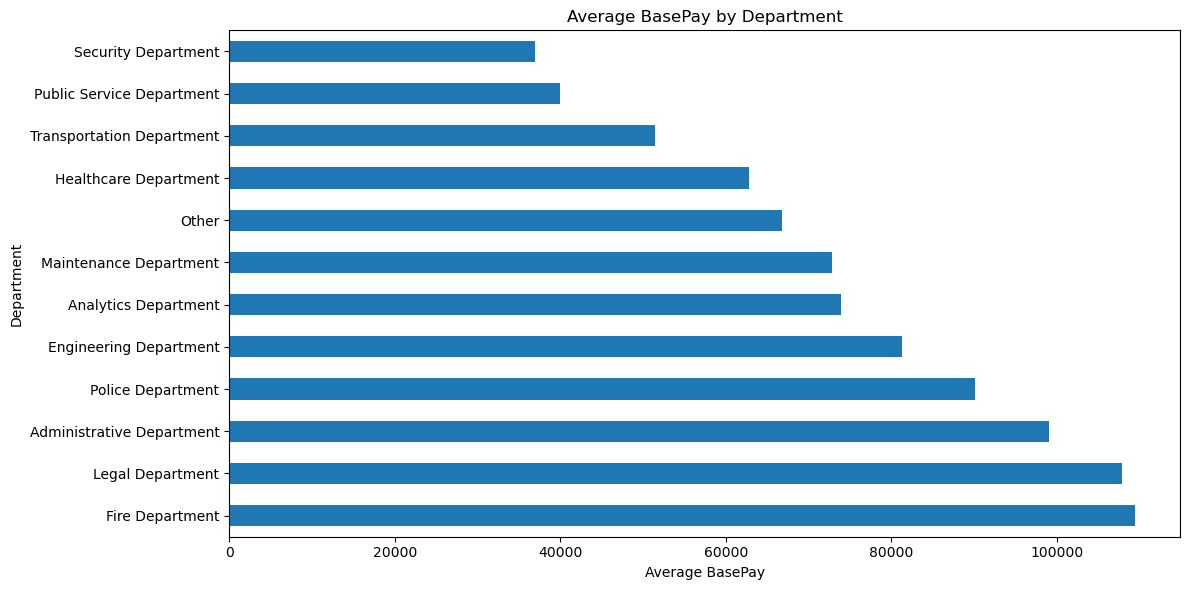

In [30]:
# Calculating the average 'BasePay' for each department
average_basepay = df.groupby('Department')['BasePay'].mean()

# Sorting the results in descending order
average_basepay = average_basepay.sort_values(ascending=False)

# Plotting a bar chart
plt.figure(figsize=(12, 6))
average_basepay.plot(kind='barh')
plt.title('Average BasePay by Department')
plt.xlabel('Average BasePay')
plt.ylabel('Department')

# Displaying the plot
plt.tight_layout()
plt.show()


# Task6
**Simple Correlation Analysiss**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

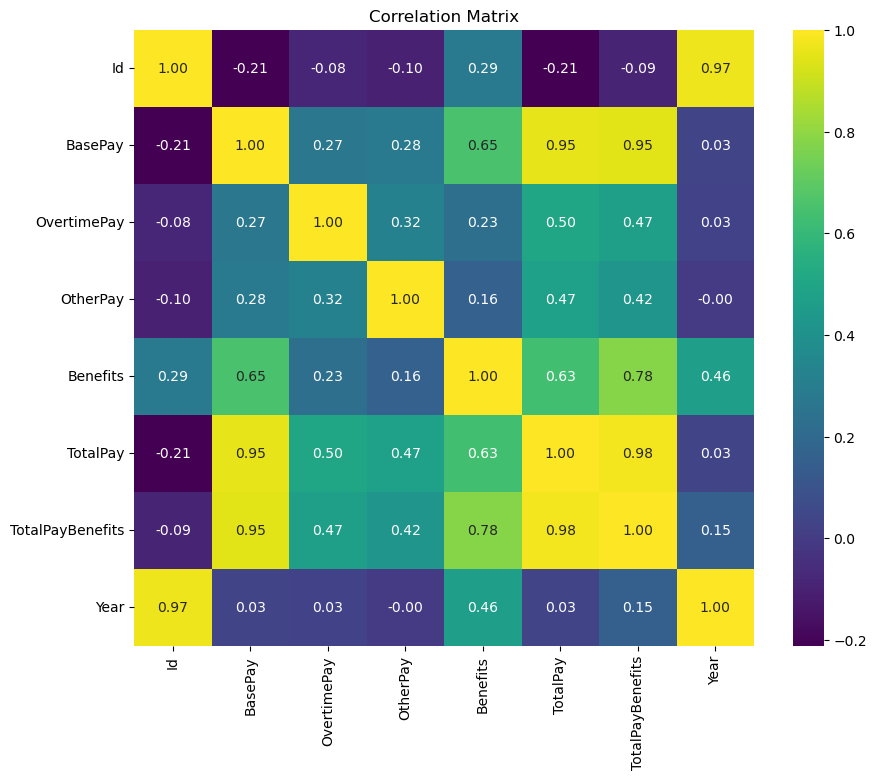

In [31]:
# Selecting numerical columns and calculating the correlation matrix

numerical_columns = df.select_dtypes(include='number')

correlation_matrix = numerical_columns.corr()

# Visualizing the correlation matrix using a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


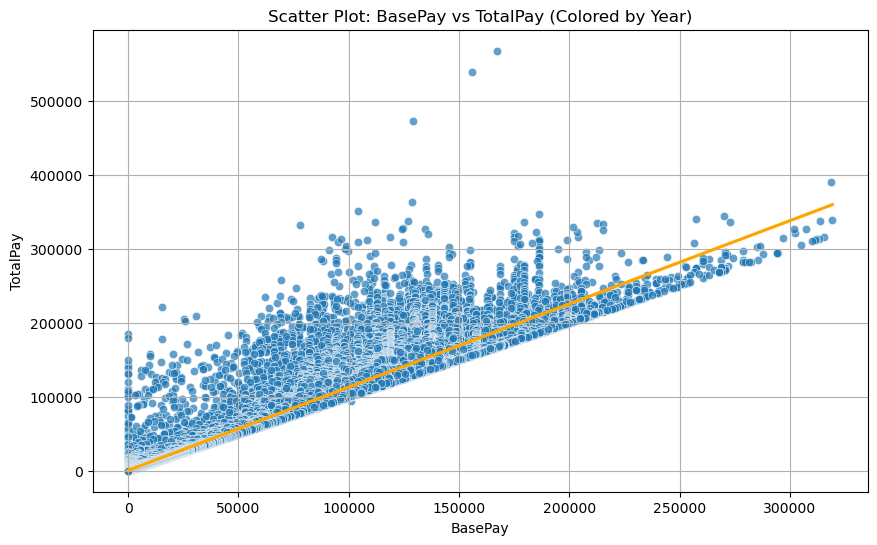

In [32]:
# Creating a scatter plot with regression line

plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='BasePay', y='TotalPay', data=df, alpha=0.7)
sns.regplot(x='BasePay', y='TotalPay', data=df, scatter=False, ax=scatter_plot, color='orange')
plt.title('Scatter Plot: BasePay vs TotalPay (Colored by Year)')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.grid(True)
plt.show()


# Task7
**Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

Insights:

1. **Job Title Variations:**
   The dataset exhibits numerous variations in job titles, including typos, different cases, and abbreviations. Establishing predefined categories during data collection could enhance consistency in job titles.

2. **Departments with the Highest Average Salary:**
   Fire Department and Legal Department showcase the highest average salary, closely followed by the Administrative Department.

3. **Redundant Column:**
   The 'Agency' column contains only one unique value, rendering it redundant. It might be beneficial to consider removing or consolidating this column to simplify the dataset.

4. **TotalPay Mode and Zero Values:**
   The mode of the 'TotalPay' column is 0, indicating a significant number of entries with no recorded salary. Further analysis is required to comprehend and address the presence of zero values, which may signify instances where no salary information is provided for certain job titles.
